In [2]:
#датасет с https://www.kaggle.com/mirichoi0218/insurance?select=insurance.csv

import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [3]:
insurance = pd.read_csv('insurance.csv')
insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


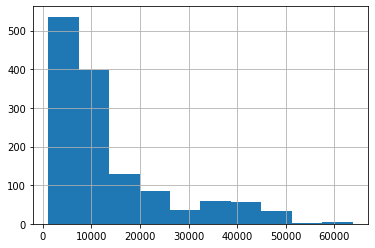

In [6]:
#будем предсказывать стоимость страховки, посмотрим какое распределение у значений
#а потом разделим charges на три группы 

insurance['charges'].hist()

In [7]:
insurance['charges_cut'] = pd.cut(insurance['charges'], [0, 20000, 40000, 70000], labels=['low', 'medium', 'high']) 
insurance['charges_cut'].head(10)

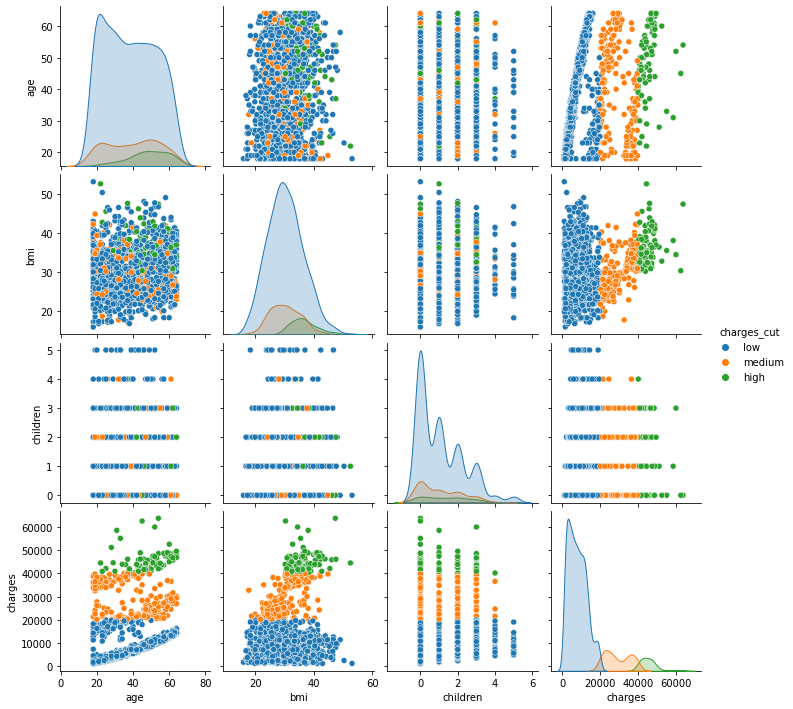

In [8]:
#смотрим, есть ли на графиках линейные зависимости 
sns.pairplot(data=insurance, hue='charges_cut')

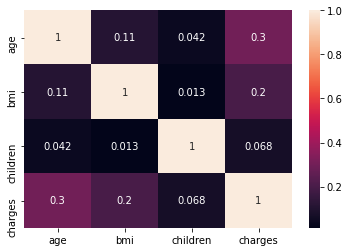

In [9]:
sns.heatmap(data=insurance.corr(), annot=True)

In [10]:
#корреляция, конечно, так себе, но попробуем построить линейную регрессию

#выбираем предикторы и предсказываемое значение 
#смотрим нужные нам метрики 
X = insurance[['age', 'bmi']]
y = insurance['charges']
reg = LinearRegression()
reg.fit(X, y)
print(reg.coef_, reg.intercept_, reg.score(X, y))

[241.9307779  332.96509081] -6424.804612240765 0.11718338606939949


In [11]:
#делаем регуляризацию L1
reg = Lasso(alpha=0.1)
reg.fit(X, y)
print(reg.score(X, y), reg.coef_, reg.intercept_)

0.11718338606739342 [241.93042087 332.96248964] -6424.710853305904


In [12]:
#делаем регуляризацию L2 
reg = Ridge(alpha=0.1)
reg.fit(X, y)
print(reg.score(X, y), reg.coef_, reg.intercept_)

ValueError: ValueError: Expected 2D array, got 1D array instead:
array=[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [39]:
from sklearn.inspection import plot_partial_dependence

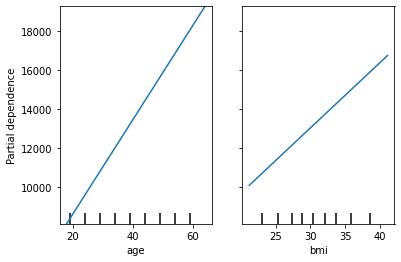

In [45]:
#c учётом того, что мультиоколлинеарности в данных особо нет, значения с регуляризацией довольно похожи 
#со значениями LinearRegression()

#визуализируем что же в итоге вышло 
fig, ax = plt.subplots()
plot_partial_dependence(reg, X,[0,1], ax=ax)

ValueError: ValueError: Expected 2D array, got 1D array instead:
array=[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

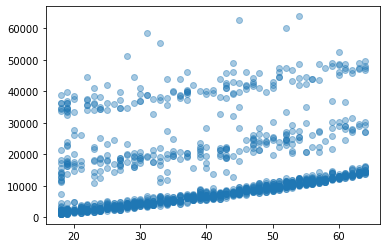

In [13]:
plt.scatter(insurance['age'], insurance['charges'], alpha=0.4)
plt.plot(X, reg.predict(y), color='red')